In [175]:
#Important values:
#welcome_table_june is the original csv, the values are turned from strings into more useable forms but should be unchanged
#
import unicodecsv
import math
import numpy
import matplotlib.pyplot as plt

In [176]:
from datetime import datetime as dt

#Reading and cleaning data


In [177]:
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [178]:
csv_list = []
welcome_table_june = read_csv('Welcome_Table_All_Dates.csv')


In [179]:
def set_to_int(column_name):
    for row in welcome_table_june:
        if row[column_name].strip() == "":
            row[column_name] = 0
        row[column_name] = int(row[column_name])


In [180]:
set_to_int('# Returns')

In [181]:
set_to_int('# New')

In [182]:
set_to_int('# in Group')

In [183]:
def parse_date(date):
    if date == '':
        return None
    else:
        try:
            return dt.strptime(date, '%m/%d/%Y')
        except:
            return dt.strptime(date, '%m/%d/%y')

In [184]:
for row in welcome_table_june:
    try:
        if len(row['Date']) > 4:
            new_date = row['Date']
        row['Date'] = parse_date(new_date)
    except:
        print row['Date']

In [185]:
#grouping data by date

In [186]:
# make compiled list by date
from collections import defaultdict

In [187]:
welcome_table_stats_by_date = defaultdict(list)

In [188]:
for row in welcome_table_june:
    welcome_table_stats_by_date[str(row["Date"]).split(' ',1)[0]].append(row)

In [189]:

#Collecting the total information for each date

summed_by_date = {}
for key in welcome_table_stats_by_date:
    total_visitors = 0
    total_new = 0
    total_returns = 0
    weather = ""
    temperature = ""
    local = 0
    fake = False
    for visit in welcome_table_stats_by_date[key]:
        if visit["Zip code"]:
            total_visitors += visit["# in Group"]
            total_new += visit["# New"]
            total_returns += visit["# Returns"]
        else:
            fake = True
        if(visit["Zip code"] == "11201"):
            local += visit["# in Group"]
        if (visit["Temperature"]):
            temperature = visit["Temperature"]
    if total_visitors != 0 and not fake:
        summed_by_date[key] = {"total_visitors": total_visitors, "total_new": total_new, "total_returns":total_returns,"from_11201": local, "Temperature": temperature}

In [190]:
import pandas

In [191]:
summed_by_date =  pandas.DataFrame.from_dict(summed_by_date, orient = 'index' )

In [192]:
summed_by_date.to_csv('welcome_table_summed.csv', sep =',')

In [193]:
#print summed_by_date['total_visitors']

In [194]:
#print summed_by_date

In [195]:
#summed_by_date.columns.name = "dates"

In [196]:
#print summed_by_date

In [197]:
#print summed_by_date.index.values

In [198]:
import json

# load from file:
with open('past_weather.json', 'r') as f:
    try:
        weather_dict = json.load(f)
    # if the file is empty the ValueError will be thrown
    except ValueError:
        data = {}

In [199]:
#print weather_dict

In [200]:
summed_by_date["visits_per_hour"] = float('nan')
summed_by_date["returns_per_hour"] = float('nan')
summed_by_date["new_per_hour"] = float('nan')
summed_by_date["from_11201_per_hour"] = float('nan')
summed_by_date["day"] = ""
summed_by_date["month"] = 6
summed_by_date["year"] = 2016
summed_by_date["precipitation"] =  float('nan')
summed_by_date["cloud_cover"] = float('nan')
summed_by_date["snow"] = float('nan')
summed_by_date["rain"] = float('nan')
for val in summed_by_date.index.values:

    if val != 'None':
        the_date = dt.strptime(val, "%Y-%m-%d")
        if the_date.weekday() >= 5:
            hours = 4
        elif the_date.weekday() == 1 or  the_date.weekday() == 3:
            hours = 2
        else:
            hours = float('nan')
        try:
            if weather_dict[val][0]['precipIntensity'] > 0:
                #print weather_dict[val][0]['precipType']
                if weather_dict[val][0]['precipType'] == 'snow':
                    summed_by_date.set_value(val, 'snow', 1)
                else:
                    summed_by_date.set_value(val, 'rain', 1)
            else:
                summed_by_date.set_value(val, 'snow', 0)
                summed_by_date.set_value(val, 'rain', 0)
                

            summed_by_date.set_value(val, 'Temperature', weather_dict[val][0]["temperatureMax"])
            summed_by_date.set_value(val, 'precipitation', weather_dict[val][0]['precipIntensity'])
            summed_by_date.set_value(val, 'cloud_cover', weather_dict[val][0]['cloudCover'])
            summed_by_date.set_value(val, "day", the_date.weekday())
            summed_by_date.set_value(val, "visits_per_hour", summed_by_date.loc[val]["total_visitors"]/(1.0*hours))
            summed_by_date.set_value(val, "returns_per_hour", summed_by_date.loc[val]["total_returns"]/(1.0*hours))
            summed_by_date.set_value(val, "new_per_hour", summed_by_date.loc[val]["total_new"]/(1.0*hours))
            summed_by_date.set_value(val, "from_11201_per_hour", summed_by_date.loc[val]["from_11201"]/(1.0*hours))
        except:
            print val

        
        #print val, weather_dict.weather[val]["temperatureMax"]
        

In [201]:
#print summed_by_date


In [202]:
cloudy_total = 0
cloudy_count = 0
clear_total = 0
clear_count = 0
for index, row in summed_by_date.iterrows():
    #print row["Temperature"]
    #print math.isnan(row['visits_per_hour'])
    if math.isnan(row['visits_per_hour']) or math.isnan(row["Temperature"]):
        print "fail"
        #print row['visits_per_hour'], row['Temperature']
    else:
        #print "good"
        #print row['visits_per_hour'], row['Temperature']
        #print "good"
        if float(row['Temperature']) < 50:
            #print "hot"
            #print row['visits_per_hour']
            #print index
            clear_total += row['visits_per_hour']
            clear_count += 1
            #print row['precipitation']

        elif float(row['Temperature']) > 50:
            #print "cold"
            cloudy_total += row['visits_per_hour']
            cloudy_count +=1
            #print row['precipitation']
    
        
#print clear_count
#print 1.0*clear_total/clear_count
#print cloudy_count
#print 1.0*cloudy_total/cloudy_count

fail
fail
fail
fail
fail


In [203]:
summed_by_date.to_csv('advanced_welcome_table_summed.csv', sep =',')

In [204]:
import matplotlib.pyplot as plt


In [205]:
import matplotlib

In [206]:
matplotlib.style.use('ggplot')

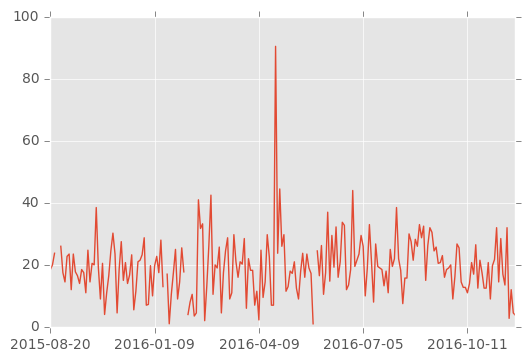

In [207]:
%matplotlib inline
summed_by_date['visits_per_hour'].plot()

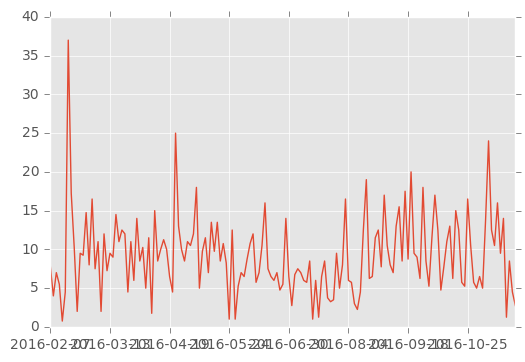

In [274]:
#graph of visits from 11201 over time
from_11201 = summed_by_date.loc[lambda summed_by_date: summed_by_date.from_11201_per_hour > 0, :]['from_11201_per_hour']
from_11201.plot()

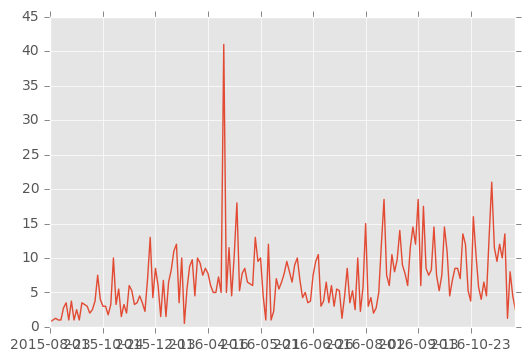

In [275]:
#graph of returns over time
returns = summed_by_date.loc[lambda summed_by_date: summed_by_date.returns_per_hour > 0, :]['returns_per_hour']
returns.plot()

In [208]:
groups = summed_by_date.groupby('day')
print summed_by_date.index

Index([u'2015-08-20', u'2015-08-22', u'2015-08-23', u'2015-08-26',
       u'2015-08-28', u'2015-08-29', u'2015-08-30', u'2015-09-10',
       u'2015-09-12', u'2015-09-13',
       ...
       u'2016-11-08', u'2016-11-10', u'2016-11-13', u'2016-11-15',
       u'2016-11-17', u'2016-11-19', u'2016-11-20', u'2016-11-22',
       u'2016-11-29', u'2016-12-03'],
      dtype='object', length=224)


no
[-160.7068369    19.47417881]


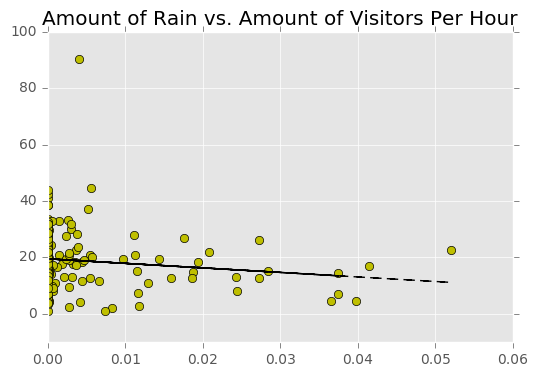

In [229]:
#Precipitation vs. amount of visitors. Approximately 3 less people per .01 of rain
import numpy as np
s = summed_by_date
x = s['precipitation']
y = s['visits_per_hour']# 10, not 9, so the fit isn't perfect
try:
    fit = np.polyfit(x,y,1)
    fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
except:
    print "no"
plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
plt.xlim(0, 0.06)
plt.ylim(-10, 100)
plt.title("Amount of Rain vs. Amount of Visitors Per Hour")

print fit

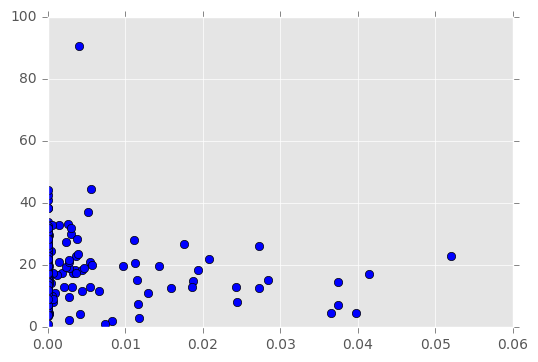

In [222]:
#Amount of people by amount of rain
plt.plot(summed_by_date['precipitation'], summed_by_date['visits_per_hour'], 'bo')
plt.show()

average of 13.1843575419 new folks
average of 6.90168539326 returns


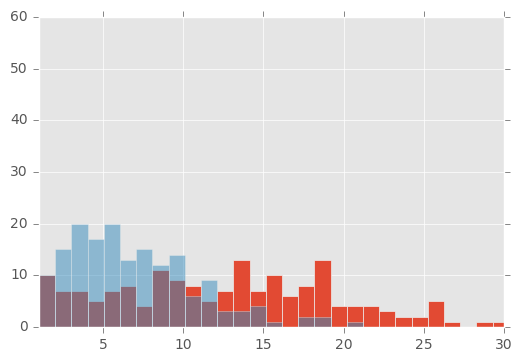

In [263]:
#comparison of new and returns
histogram3 = plt.figure()
new_drop = summed_by_date.loc[lambda summed_by_date: summed_by_date.new_per_hour > 0, :]['new_per_hour'].mean()
return_drop = summed_by_date.loc[lambda summed_by_date: summed_by_date.returns_per_hour > 0, :]['returns_per_hour'].mean()
print "average of "+ str(new_drop) + " new folks"
print "average of " + str(return_drop) + " returns"
x = summed_by_date['new_per_hour'].dropna()
y = summed_by_date['returns_per_hour'].dropna()

bins = numpy.linspace(0,100,100)
plt.hist(x, bins, alpha=1)
plt.hist(y, bins, alpha=0.5)
plt.xlim(1,30)
plt.show()

In [ ]:
histogram4 = plt.figure()
from_11201_drop = summed_by_date.loc[lambda summed_by_date: summed_by_date.from_11201_per_hour > 0, :]['from_11201_per_hour'].mean()

print "average of "+ str(new_drop) + " new folks"
print "average of " + str(return_drop) + " returns"
x = summed_by_date['new_per_hour'].dropna()
y = summed_by_date['returns_per_hour'].dropna()

bins = numpy.linspace(0,100,100)
plt.hist(x, bins, alpha=1)
plt.hist(y, bins, alpha=0.5)
plt.xlim(1,30)
plt.show()

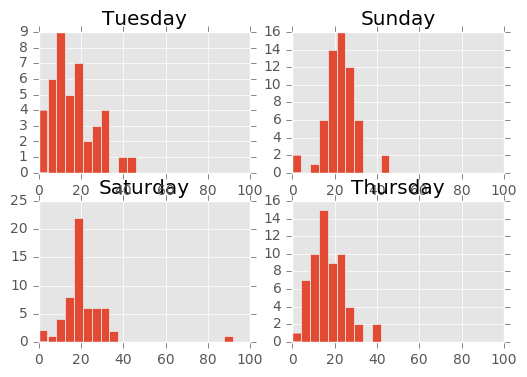

In [230]:
#comparison of all days we're open. Shows that Tuesdays are the most random days.
import random
histogram=plt.figure()

x = summed_by_date['visits_per_hour'].dropna()
y = summed_by_date.loc[lambda summed_by_date: summed_by_date.day > 5, :]['visits_per_hour'].dropna()
z = summed_by_date.loc[lambda summed_by_date: summed_by_date.day ==5, :]['visits_per_hour'].dropna()
z1 = summed_by_date.loc[lambda summed_by_date: summed_by_date.day ==3, :]['visits_per_hour'].dropna()
z2 = summed_by_date.loc[lambda summed_by_date: summed_by_date.day ==1, :]['visits_per_hour'].dropna()
bins = numpy.linspace(0, 100, 25)
#plt.subplot(221)
#plt.hist(x, bins, alpha=0.5)
plt.subplot(222)
plt.hist(y, bins, alpha=1)
plt.title('Sunday')
plt.subplot(223)
plt.hist(z, bins, alpha =1)
plt.title('Saturday')
plt.subplot(224)
plt.hist(z1, bins, alpha = 1)
plt.title('Thursday')
plt.subplot(221)
plt.hist(z2, bins, alpha = 1)
plt.title('Tuesday')
plt.show()

In [ ]:
#comparison of all days we're open. Shows that Tuesdays are the most random days.
import random
histogram=plt.figure()

x = summed_by_date['visits_per_hour'].dropna()
y = summed_by_date.loc[lambda summed_by_date: summed_by_date.day > 5, :]['visits_per_hour'].dropna()
z = summed_by_date.loc[lambda summed_by_date: summed_by_date.day ==5, :]['visits_per_hour'].dropna()
z1 = summed_by_date.loc[lambda summed_by_date: summed_by_date.day ==3, :]['visits_per_hour'].dropna()
z2 = summed_by_date.loc[lambda summed_by_date: summed_by_date.day ==1, :]['visits_per_hour'].dropna()
bins = numpy.linspace(0, 100, 50)

plt.hist(x, bins, alpha=0.5)
plt.hist(y, bins, alpha=1)
plt.hist(z, bins, alpha =1)
plt.hist(z1, bins, alpha = 1)
plt.hist(z2, bins, alpha = 1)
plt.show()

In [ ]:
# rainy vs. Not Rainy days
histogram2=plt.figure()
y = summed_by_date.loc[lambda summed_by_date: summed_by_date.rain == 1, :]['visits_per_hour'].dropna()
z = summed_by_date.loc[lambda summed_by_date: summed_by_date.rain == 0, :]['visits_per_hour'].dropna()
plt.hist(z, bins, alpha=1)
plt.hist(y, bins, alpha=1)

plt.show()


In [ ]:
# snowy vs. Not snowy days
histogram2=plt.figure()
y = summed_by_date.loc[lambda summed_by_date: summed_by_date.snow == 1, :]['visits_per_hour'].dropna()
z = summed_by_date.loc[lambda summed_by_date: summed_by_date.snow == 0, :]['visits_per_hour'].dropna()
plt.hist(z, bins, alpha=1)
plt.hist(y, bins, alpha=1)

plt.show()

In [ ]:
#the amount of people visiting each hour binned
summed_by_date.plot.hist(y = "visits_per_hour")

In [ ]:
# days that had more than 40 visitors
print summed_by_date.loc[lambda summed_by_date: summed_by_date.visits_per_hour > 40, :]

In [ ]:
print summed_by_date.loc[lambda summed_by_date: summed_by_date.snow == 1, :]["visits_per_hour"]


In [ ]:
print summed_by_date.loc[lambda summed_by_date: summed_by_date.snow == 0, :]["visits_per_hour"].mean()

In [ ]:
print summed_by_date.loc[lambda summed_by_date: summed_by_date.snow == 1, :]["visits_per_hour"].mean() #only 2 data points

In [ ]:
#Average for rain and no rain

In [ ]:
print summed_by_date.loc[lambda summed_by_date: summed_by_date.rain == 1, :]["visits_per_hour"].mean()

In [ ]:
print summed_by_date.loc[lambda summed_by_date: summed_by_date.rain == 0, :]["visits_per_hour"].mean()

In [ ]:
# average of days of the week

In [ ]:
print summed_by_date.loc[lambda summed_by_date: summed_by_date.day > 5, :]["visits_per_hour"].mean()

In [ ]:
print summed_by_date.loc[lambda summed_by_date: summed_by_date.day == 5, :]["visits_per_hour"].mean()

In [ ]:
print summed_by_date.loc[lambda summed_by_date: summed_by_date.day == 1, :]["visits_per_hour"].mean()

In [ ]:
print summed_by_date.loc[lambda summed_by_date: summed_by_date.day == 3, :]["visits_per_hour"].mean()

In [ ]:
#from ggplot import *

#gg = ggplot(summed_by_date, aes( x = summed_by_date.index, y = "visits_per_hour", color = "day")) + geom_point() + geom_line()

In [ ]:
plt.figure()
summed_by_date.plot.scatter(x = "Temperature", y = "visits_per_hour", s= summed_by_date['day']*200.0)

In [ ]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [ ]:
import pandasql

In [ ]:
q = """SELECT AVG(visits_per_hour) FROM summed_by_date GROUP BY day;"""

    # Execute your SQL command against the pandas frame
welcome_solution = pandasql.sqldf(q, locals())
print welcome_solution     

In [ ]:
import numpy
import pandas
import pylab
x = summed_by_date["precipitation"]
y = summed_by_date["visits_per_hour"]

x, y = zip(*sorted((xVal, numpy.mean([yVal for a, yVal in zip(x, y) if xVal==a])) for xVal in set(x)))
df = pandas.DataFrame(
    {'x': x,
     'y': y,
    })
df.plot.scatter(x = 'x', y = 'y')
z = numpy.polyfit(x, y, 1)
p = numpy.poly1d(z)
pylab.plot(x,p(x),"r--")
# the line equation:
print "y=%.6fx+(%.6f)"%(z[0],z[1])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)

fig.show()